# Example 02: Indentation experiment

This script provides an example of fitting of a force-indentation curve.
First import the packages.

In [1]:
using RHEOSafm
using RHEOS

using Plots
using Plots.PlotMeasures
gr();

next import the .txt file obtained from the JPK software

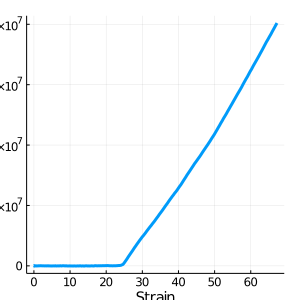

In [2]:
input_file = joinpath(@__DIR__, "assets", "AFM_contact_test.txt")
R = 150e-9; # Radious of the indenter
interface = AFM(R);
data = importJPK(input_file, interface, sections = ["extend"]);

plot(data.ϵ, data.σ, legend = false, xlabel = "Strain", ylabel = "Stress", guidefont= 10, size = (300,300), label = "Original data", lw=3, margin=2mm)

To detect the point at which approximately contact occurs using RHEOSafm it is possible to:
1) define a force threshold
2) apply Hertz spherical contact model
In this example the "hertz" method is used. Two parameters are provided: the radious of the indenter and the segment of the curve used to estimate the contact point (number between 0 and 1). An application of the thrshold method is availabel in example 01.

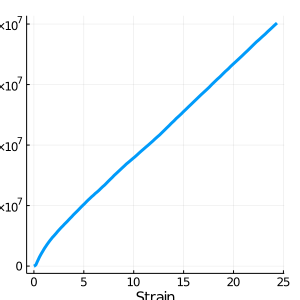

In [3]:
data_contact = contact_point(data, interface, "hertz", (R = R, s = 0.5));
plot(data_contact.ϵ, data_contact.σ, legend = false, xlabel = "Strain", ylabel = "Stress", guidefont= 10, size = (300,300), label = "Shifted data", lw=3, margin=2mm)

The indentation curve is then fitted using a Standard Linear Solid model

In [4]:
SLS_model = modelfit(data_contact,SLS_Zener, strain_imposed);

┌ Warning: Initial values for model parameters are set to [0.5, 0.5, 0.5] by default
└ @ RHEOS /home/runner/.julia/packages/RHEOS/UUrax/src/processing.jl:250
Time: 7.41197295 s, Why: XTOL_REACHED, Parameters: [3550.0871377649355, 5.535984602078609e6, 2.8201426042235414e6], Error: 1.850203753681087e13


Now we can extract the strain pattern

In [5]:
SLS_predict = extract(data_contact, strain_only);

and calculate the stress based on the fitted model

In [6]:
SLS_predict = modelpredict(SLS_predict, SLS_model);

Now we can plot data and model together for comparison

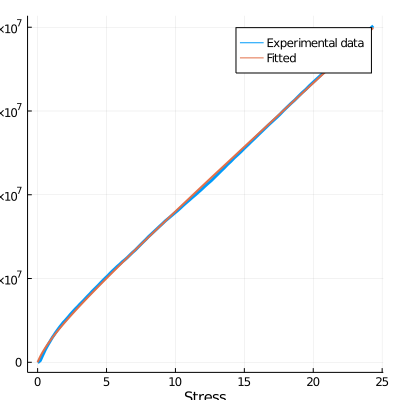

In [7]:
plot(data_contact.ϵ, data_contact.σ, legend = true, xlabel = "Stress", ylabel = "Stress", label = "Experimental data", guidefont= 10, size = (500,500), lw=3, margin=2mm)
plot!(SLS_predict.ϵ, SLS_predict.σ, label = "Fitted",guidefont= 10, size = (400,400), lw=2)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*